# Installs and settings


In [ ]:
%pip install pandas
%pip install catboost
%pip install xgboost
%pip install sklearn
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install csv
%pip install joblib
%pip install scipy
%pip install h5py scikit-optimize
%pip install optuna
%pip install dataframe_image
%pip install openpyxl
%pip install lightgbm


In [55]:
from sklearn.exceptions import DataConversionWarning
import warnings
import dataframe_image as dfi
import statistics
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

import csv

import xgboost
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

import catboost as cb
from catboost import CatBoostError

import lightgbm as lgbm

import joblib

import sklearn
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity

import optuna

%matplotlib inline


warnings.filterwarnings(action='ignore', category=DataConversionWarning)


# Importing file and first analysis


In [56]:
%%time
data_chunk = pd.read_csv(
    f'_select_dealstage_name_as_Стадия_сделки_broker_service_title_as.csv', chunksize=100_000)
data_chunk


CPU times: total: 15.6 ms
Wall time: 16 ms


In [59]:
%%time
# storing the chunks after iterating from chunk object

chunk_data = [chunk for chunk in data_chunk]

# concatnating dataframes to make it a complete dataset

dataset = pd.concat(chunk_data)


<timed exec>:3: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 1.61 s
Wall time: 1.64 s


In [60]:
dataset


,Стадия сделки,Услуга,Название сделки,ID сделки,Связанные сделки,Статус платежа,ID платежа,Название платежа,Ответственный по сделке,ID брокера,...,ФИО КМ,Табельный номер КМ,ФИО ПС,Табельный номер ПС,Комментарий,Комментарий СК,Доп Комментарий СК,Комментарий Брокера,Доп Комментарий Брокера,asiiii
0,Заявка на котировку,NaN,ИМЩ ЮЛ_3419012240_Горюнов Сергей_163_3919,3919,NaN,NaN,NaN,NaN,Горюнов Сергей,1730,...,Сорокопудова Ю.С.,NaN,NaN,NaN,<div>Не согласован с СК.</div><div><br></div><...,NaN,NaN,NaN,NaN,3919
1,Договор заключен,NaN,АВТОТР_7603031033_Рузанова Анна_176_<5149>,5149,NaN,NaN,NaN,NaN,Рузанова Анна,1675,...,NaN,NaN,NaN,NaN,Страхование ДАГО автомобиль фургон 27990 А262ТН76,NaN,NaN,NaN,NaN,5149
2,Договор заключен,NaN,ЖИВОТ без ГП_2334001350_Жуваго Александр_123_8263,8263,NaN,NaN,NaN,NaN,Жуваго Александр,1706,...,Хомякова Наталья Викторовна,777920,NaN,NaN,<b><u>ДЗ ЗАКРЫТ</u></b>,NaN,NaN,NaN,NaN,8263
3,Договор заключен,NaN,ИМЩ ЮЛ_5806003380_Сигунов Илья_158_<8393>,8393,NaN,NaN,NaN,NaN,Сигунов Илья,1899,...,Симакин Николай Николаевич,1221915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8393
4,Договор заключен,NaN,ИМЩ ЮЛ_3123123826_Атаманова Ольга_131_10267,10267,NaN,NaN,NaN,NaN,Атаманова Ольга,1819,...,Харламов Алексей Константинович,412117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45624,Отказ клиента — другой брокер / СК,Веб-витрина,ИМЩ ЮЛ-КЕПКА_861005055686_Ган Ольга_86_<789321>,789321,NaN,Отклонен,796504.0,Платеж по сделке ИМЩ ЮЛ-КЕПКА_861005055686_Ган...,Ган Ольга,2608,...,Талипова Альбина Раилевна,01208944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,789321
45625,Сделка объединена в один договор,Прямое страхование,ИМЩ ЮЛ_7725278380_Ковальчук Наталья_42_<790537>,790537,NaN,NaN,NaN,NaN,Ковальчук Наталья,1972,...,Герман Наталья Владимировна,351116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,790537
45626,Договор заключен,Прямое страхование,АВТОТР_8107010670_Барабаш Наталья_59_<790585>,790585,NaN,Оплачен,797830.0,Платеж по сделке АВТОТР_8107010670_Барабаш Нат...,Барабаш Наталья,2361,...,Жданова Светлана Геннадьевна,00790530,NaN,NaN,NaN,Согласовано,NaN,Согласовано,NaN,790585
45627,Отказ клиента — не интересен данный вид страхо...,Прямое страхование,НСиБ_616611471159_Пятин Василий_23_<790920>,790920,636808,NaN,NaN,NaN,Пятин Василий,1786,...,Морозова Ксения Вадимовна,01539829,NaN,NaN,Партнер/страховщик: ВСК\r\nПолис: 20090G7Z0012...,NaN,NaN,NaN,NaN,790920


In [61]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45629 entries, 0 to 45628
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Стадия сделки                      45557 non-null  object 
 1   Услуга                             38947 non-null  object 
 2   Название сделки                    45629 non-null  object 
 3   ID сделки                          45629 non-null  int64  
 4   Связанные сделки                   9922 non-null   object 
 5   Статус платежа                     25116 non-null  object 
 6   ID платежа                         25116 non-null  float64
 7   Название платежа                   25116 non-null  object 
 8   Ответственный по сделке            45517 non-null  object 
 9   ID брокера                         45629 non-null  int64  
 10  Ответственный по платежу           25099 non-null  object 
 11  Создал платеж                      25026 non-null  obj

In [62]:
dataset.value_counts()


Series([], dtype: int64)

In [ ]:
for col in dataset:
    print("\n")
    print(col, dataset[col].unique())


In [64]:
for col in dataset:
    print(col, dataset[col].nunique())


Стадия сделки 19
Услуга 7
Название сделки 42215
ID сделки 42215
Связанные сделки 8949
Статус платежа 3
ID платежа 25116
Название платежа 24710
Ответственный по сделке 285
ID брокера 289
Ответственный по платежу 260
Создал платеж 274
ИНН 23823
ИНН заемщика 1339
Клиент 29714
Лицо 4
Дата создания сделки 41113
Дата создания платежа 24182
Дата изменения сделки 517
Дата начала договора 10570
Дата окончания договора 10688
Дата котировки 19674
Дата догвора 1614
Предполагаемая дата завершения 2118
Дата оплаты фактическая 5525
Ожидаемая дата оплаты 20687
Тип сделки 29
Признак кампании продаж 45
Периодичность оплаты СП 4
Страховая сумма 20938
Сумма залога 4826
Страховая премия 21830
Страховой взнос 21273
% КВ 163
Сумма платежа 13776
КВ от платежа 14366
КВ от платежа без НДС 14366
Залог/не залог 2
Партнер/Страховщик 39
Вид страхования 50
Номер полиса 32171
№ ПП 3888
ТБ 16
ГОСБ 99
Регион 85
Город 798
Тип клиента банка/сегмент клиента 10
Тип клиента Банка/сегмент сделки 13
ФИО КМ 10022
Табельный ном

# Cleaning up dataset


## Deleting columns


In [65]:
# Additional
dataset.drop('Дата догвора', axis=1, inplace=True)
dataset.drop('Предполагаемая дата завершения', axis=1, inplace=True)
dataset.drop('Дата начала договора', axis=1, inplace=True)
dataset.drop('Дата окончания договора', axis=1, inplace=True)


# Main part
dataset.drop('ИНН заемщика', axis=1, inplace=True)
dataset.drop('Табельный номер ПС', axis=1, inplace=True)
dataset.drop('ФИО ПС', axis=1, inplace=True)
dataset.drop('Комментарий', axis=1, inplace=True)
dataset.drop('ID сделки', axis=1, inplace=True)
dataset.drop('Название сделки', axis=1, inplace=True)
dataset.drop('Номер полиса', axis=1, inplace=True)


In [66]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45629 entries, 0 to 45628
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Стадия сделки                      45557 non-null  object 
 1   Услуга                             38947 non-null  object 
 2   Связанные сделки                   9922 non-null   object 
 3   Статус платежа                     25116 non-null  object 
 4   ID платежа                         25116 non-null  float64
 5   Название платежа                   25116 non-null  object 
 6   Ответственный по сделке            45517 non-null  object 
 7   ID брокера                         45629 non-null  int64  
 8   Ответственный по платежу           25099 non-null  object 
 9   Создал платеж                      25026 non-null  object 
 10  ИНН                                43731 non-null  object 
 11  Клиент                             44563 non-null  obj

In [ ]:
for col in dataset:
    print("\n")
    print(col, dataset[col].unique())


In [68]:
for col in dataset:
    print(col, dataset[col].nunique())


Стадия сделки 19
Услуга 7
Связанные сделки 8949
Статус платежа 3
ID платежа 25116
Название платежа 24710
Ответственный по сделке 285
ID брокера 289
Ответственный по платежу 260
Создал платеж 274
ИНН 23823
Клиент 29714
Лицо 4
Дата создания сделки 41113
Дата создания платежа 24182
Дата изменения сделки 517
Дата котировки 19674
Дата оплаты фактическая 5525
Ожидаемая дата оплаты 20687
Тип сделки 29
Признак кампании продаж 45
Периодичность оплаты СП 4
Страховая сумма 20938
Сумма залога 4826
Страховая премия 21830
Страховой взнос 21273
% КВ 163
Сумма платежа 13776
КВ от платежа 14366
КВ от платежа без НДС 14366
Залог/не залог 2
Партнер/Страховщик 39
Вид страхования 50
№ ПП 3888
ТБ 16
ГОСБ 99
Регион 85
Город 798
Тип клиента банка/сегмент клиента 10
Тип клиента Банка/сегмент сделки 13
ФИО КМ 10022
Табельный номер КМ 9489
Комментарий СК 5
Доп Комментарий СК 128
Комментарий Брокера 3
Доп Комментарий Брокера 10
asiiii 42215


## Dealing with Nulls


In [69]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45629 entries, 0 to 45628
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Стадия сделки                      45557 non-null  object 
 1   Услуга                             38947 non-null  object 
 2   Связанные сделки                   9922 non-null   object 
 3   Статус платежа                     25116 non-null  object 
 4   ID платежа                         25116 non-null  float64
 5   Название платежа                   25116 non-null  object 
 6   Ответственный по сделке            45517 non-null  object 
 7   ID брокера                         45629 non-null  int64  
 8   Ответственный по платежу           25099 non-null  object 
 9   Создал платеж                      25026 non-null  object 
 10  ИНН                                43731 non-null  object 
 11  Клиент                             44563 non-null  obj

In [ ]:
a = dataset['Табельный номер КМ'].value_counts()
print(a.to_string())


In [71]:
# Ответственный по сделке возможно тоже стоит

dataset = dataset[~dataset['Стадия сделки'].isnull()]
dataset = dataset[~dataset['ИНН'].isnull()]
dataset = dataset[~dataset['Регион'].isnull()]
dataset = dataset[~dataset['Вид страхования'].isnull()]
dataset = dataset[~dataset['% КВ'].isnull()]
dataset = dataset[~dataset['Залог/не залог'].isnull()]
dataset = dataset[~dataset['Стадия сделки'].isnull()]
dataset = dataset[~dataset['Страховая сумма'].isnull()]
dataset = dataset[~dataset['Тип сделки'].isnull()]
dataset = dataset[~dataset['Клиент'].isnull()]
dataset = dataset[~dataset['Услуга'].isnull()]
dataset = dataset[~dataset['Лицо'].isnull()]


dataset = dataset[dataset['ID брокера'] != 1]
dataset = dataset[dataset['Партнер/Страховщик'] != 'Тестовая учетная запись']
dataset = dataset[dataset['Партнер/Страховщик'] != 'Test1']


dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34938 entries, 418 to 45628
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Стадия сделки                      34938 non-null  object 
 1   Услуга                             34938 non-null  object 
 2   Связанные сделки                   9671 non-null   object 
 3   Статус платежа                     24285 non-null  object 
 4   ID платежа                         24285 non-null  float64
 5   Название платежа                   24285 non-null  object 
 6   Ответственный по сделке            34928 non-null  object 
 7   ID брокера                         34938 non-null  int64  
 8   Ответственный по платежу           24285 non-null  object 
 9   Создал платеж                      24214 non-null  object 
 10  ИНН                                34938 non-null  object 
 11  Клиент                             34938 non-null  o

In [ ]:
for col in dataset:
    print("\n")
    print(col, dataset[col].unique())


In [ ]:
for col in dataset:
    print(col, dataset[col].nunique())


## Applying business req


In [74]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34938 entries, 418 to 45628
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Стадия сделки                      34938 non-null  object 
 1   Услуга                             34938 non-null  object 
 2   Связанные сделки                   9671 non-null   object 
 3   Статус платежа                     24285 non-null  object 
 4   ID платежа                         24285 non-null  float64
 5   Название платежа                   24285 non-null  object 
 6   Ответственный по сделке            34928 non-null  object 
 7   ID брокера                         34938 non-null  int64  
 8   Ответственный по платежу           24285 non-null  object 
 9   Создал платеж                      24214 non-null  object 
 10  ИНН                                34938 non-null  object 
 11  Клиент                             34938 non-null  o

In [75]:
a = dataset['Стадия сделки'].value_counts()
print(a.to_string())


Договор заключен                                       23897
Отказ клиента — не интересен данный вид страхования     3730
Ошибка                                                  2231
Имущество клиента вышло из под залога                   2164
Сделка не заключена                                      709
Заявка на котировку                                      578
Сделка объединена в один договор                         304
Заполнение данных                                        263
Застраховано через Web-витрину                           253
Отказ - доп. соглашение без доплат                       172
Отказ клиента — другой брокер / СК                       170
Клиент не идет на контакт                                111
Предложение клиенту                                      107
Отказ клиента — не устроило предложение по тарифам        76
Отказ - застраховали через АСБС                           59
Предприятие ликвидировано / Приостановлено                50
Согласование договора   

In [76]:

temp_lis = ["Согласование договора", "Предложение клиенту",
            "Заявка на котировку", "Заполнение данных"]

# WON
dataset.loc[dataset['Стадия сделки'] ==
            "Договор заключен", 'Стадия сделки'] = "WON"

# LOSE
dataset.loc[(dataset['Стадия сделки'] != "WON") & (np.logical_not(
    dataset['Стадия сделки'].isin(temp_lis))), 'Стадия сделки'] = "LOSE"


In [77]:
a = dataset['Стадия сделки'].value_counts()
print(a.to_string())


WON                      23897
LOSE                     10059
Заявка на котировку        578
Заполнение данных          263
Предложение клиенту        107
Согласование договора       34


In [78]:
data_labels = ['WON', 'LOSE', 'Заявка на котировку',
               'Заполнение данных', 'Предложение клиенту', 'Согласование договора']


## Filling in data and fixing vars


In [ ]:
a = dataset['Связанные сделки'].value_counts()
print(a.to_string())


In [ ]:
dataset['ИНН'] = dataset['ИНН'].str.replace(r'\r\n', '')
dataset.loc[dataset['ИНН'] == "ФЛ", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН'] == "Физ.Лицо", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН'] == "Фл", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН'] == "Ф/Л", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН'] == "Фл", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН'] == "Фл", 'ИНН'] = "фл"


In [ ]:
a = dataset['Табельный номер КМ'].value_counts()
print(a.to_string())


In [82]:
# Changing value
# Filling zeroes
dataset['Страховой взнос'] = dataset['Страховой взнос'].fillna(0)
dataset['Сумма залога'] = dataset['Сумма залога'].fillna(0)
dataset['Страховая премия'] = dataset['Страховая премия'].fillna(0)
dataset['Связанные сделки'] = dataset['Связанные сделки'].fillna(0)

# Filling NO-s
dataset['Клиент'] = dataset['Клиент'].fillna(0)
dataset['ТБ'] = dataset['ТБ'].fillna("0")
dataset['ГОСБ'] = dataset['ГОСБ'].fillna("0")
dataset['Город'] = dataset['Город'].fillna(0)
dataset['Тип клиента банка/сегмент клиента'] = dataset['Тип клиента банка/сегмент клиента'].fillna(
    "0")
dataset['Тип клиента Банка/сегмент сделки'] = dataset['Тип клиента Банка/сегмент сделки'].fillna(
    "0")
dataset['Табельный номер КМ'] = dataset['Табельный номер КМ'].fillna("0")
dataset['Периодичность оплаты СП'] = dataset['Периодичность оплаты СП'].fillna(
    "0")
dataset['Признак кампании продаж'] = dataset['Признак кампании продаж'].fillna(
    "0")


In [83]:
dataset["Дата создания сделки"] = pd.to_datetime(
    dataset["Дата создания сделки"])
dataset["Дата изменения сделки"] = pd.to_datetime(
    dataset["Дата изменения сделки"])
dataset["Дата котировки"] = pd.to_datetime(
    dataset["Дата котировки"], errors='coerce')


In [84]:
# Categorical types
dataset["Стадия сделки"] = dataset["Стадия сделки"].astype("category")
dataset["Услуга"] = dataset["Услуга"].astype("category")
dataset["Ответственный по сделке"] = dataset["Ответственный по сделке"].astype(
    "category")
dataset["Лицо"] = dataset["Лицо"].astype("category")
dataset["Тип сделки"] = dataset["Тип сделки"].astype("category")
dataset["Признак кампании продаж"] = dataset["Признак кампании продаж"].astype(
    "category")
dataset["Периодичность оплаты СП"] = dataset["Периодичность оплаты СП"].astype(
    "category")
dataset["Залог/не залог"] = dataset["Залог/не залог"].astype("category")
dataset["Партнер/Страховщик"] = dataset["Партнер/Страховщик"].astype(
    "category")
dataset["Вид страхования"] = dataset["Вид страхования"].astype("category")
dataset["ТБ"] = dataset["ТБ"].astype("category")
dataset["ГОСБ"] = dataset["ГОСБ"].astype("category")
dataset["Регион"] = dataset["Регион"].astype("category")
dataset["Тип клиента банка/сегмент клиента"] = dataset["Тип клиента банка/сегмент клиента"].astype(
    "category")
dataset["Тип клиента Банка/сегмент сделки"] = dataset["Тип клиента Банка/сегмент сделки"].astype(
    "category")


In [85]:
# to Numeric

ъdataset['Связанные сделки'] = pd.to_numeric(
    dataset['Связанные сделки'], errors='coerce')


In [86]:
# to string

dataset['Клиент'] = dataset['Клиент'].astype(str)
dataset['Город'] = dataset['Город'].astype(str)
dataset['ФИО КМ'] = dataset['ФИО КМ'].astype(str)


In [87]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34938 entries, 418 to 45628
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Стадия сделки                      34938 non-null  category      
 1   Услуга                             34938 non-null  category      
 2   Связанные сделки                   34908 non-null  float64       
 3   Статус платежа                     24285 non-null  object        
 4   ID платежа                         24285 non-null  float64       
 5   Название платежа                   24285 non-null  object        
 6   Ответственный по сделке            34928 non-null  category      
 7   ID брокера                         34938 non-null  int64         
 8   Ответственный по платежу           24285 non-null  object        
 9   Создал платеж                      24214 non-null  object        
 10  ИНН                             

In [88]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34938 entries, 418 to 45628
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Стадия сделки                      34938 non-null  category      
 1   Услуга                             34938 non-null  category      
 2   Связанные сделки                   34908 non-null  float64       
 3   Статус платежа                     24285 non-null  object        
 4   ID платежа                         24285 non-null  float64       
 5   Название платежа                   24285 non-null  object        
 6   Ответственный по сделке            34928 non-null  category      
 7   ID брокера                         34938 non-null  int64         
 8   Ответственный по платежу           24285 non-null  object        
 9   Создал платеж                      24214 non-null  object        
 10  ИНН                             

# ML


## Encoding


In [89]:
encoder = preprocessing.LabelEncoder()
target_encoder = preprocessing.LabelEncoder()

encoded_dataframe = dataset.copy()

for col in dataset:
    if (col != 'Стадия сделки'):
        print("Column: " + col)
        print("Type: ", dataset[col].dtype)
        encoded_dataframe[col] = encoder.fit_transform(dataset[col])
        print("------")
    else:
        print("Target: " + col)
        print("Type: ", dataset[col].dtype)
        encoded_dataframe[col] = target_encoder.fit_transform(dataset[col])
        print("------")


Target: Стадия сделки
Type:  category
------
Column: Услуга
Type:  category
------
Column: Связанные сделки
Type:  float64
------
Column: Статус платежа
Type:  object
------
Column: ID платежа
Type:  float64
------
Column: Название платежа
Type:  object
------
Column: Ответственный по сделке
Type:  category
------
Column: ID брокера
Type:  int64
------
Column: Ответственный по платежу
Type:  object
------
Column: Создал платеж
Type:  object
------
Column: ИНН
Type:  object
------
Column: Клиент
Type:  object
------
Column: Лицо
Type:  category
------
Column: Дата создания сделки
Type:  datetime64[ns]
------
Column: Дата создания платежа
Type:  object
------
Column: Дата изменения сделки
Type:  datetime64[ns]
------
Column: Дата котировки
Type:  datetime64[ns]
------
Column: Дата оплаты фактическая
Type:  object
------
Column: Ожидаемая дата оплаты
Type:  object
------
Column: Тип сделки
Type:  category
------
Column: Признак кампании продаж
Type:  category
------
Column: Периодичность 

In [90]:
X = encoded_dataframe.drop(labels='Стадия сделки', axis=1)
y = encoded_dataframe['Стадия сделки']
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


### Extract data


In [40]:
X_extract = dataset.drop(labels='Стадия сделки', axis=1)
y_extract = dataset['Стадия сделки']
x_train_extract, x_test_extract, y_train_extract, y_test_extract = train_test_split(
    X_extract, y_extract, test_size=0.3, random_state=42, stratify=y)


In [41]:
extract_df = x_test_extract.copy()
extract_df['Стадия сделки'] = y_test_extract
extract_df = extract_df.drop(
    extract_df[extract_df['Стадия сделки'] == 'WON'].index)
extract_df = extract_df.drop(
    extract_df[extract_df['Стадия сделки'] == 'LOSE'].index)


In [170]:
extract_df.to_excel('goal-.xlsx')


## Using Xgboost Optuna


In [25]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)
    param = {
        "verbosity": 1,
        'booster': trial.suggest_categorical('booster', ["gbtree", "gblinear", "dart"]),

        'n_estimators': trial.suggest_int('n_estimators', 5_000, 10_000),
        'early_stopping_rounds': 500,  # 3
        'max_bin': trial.suggest_int('max_bin', 50, 750, 1),
        'objective': 'binary:logistic',
        'eval_metric': f1_eval,
        'alpha': trial.suggest_float('alpha', 1e-5, 3.0),
        'lambda': trial.suggest_float('lambda', 1e-5, 3.0),


    }
    # """
    if param["booster"] in ["gbtree", "dart"]:


        param['num_parallel_tree'] = trial.suggest_int(
            'num_parallel_tree', 2, 20)
        param['learning_rate'] = trial.suggest_categorical(
            'learning_rate', np.arange(1e-6, 5.0, 0.00001))
        param['gamma'] = trial.suggest_categorical(
            'gamma', np.arange(1e-6, 20.0, 0.00005))
        param['max_depth'] = trial.suggest_int('max_depth', 1, 20)
        param['min_child_weight'] = trial.suggest_int(
            'min_child_weight', 1, 30)
        param['max_delta_step'] = trial.suggest_int('max_delta_step', 1, 30)
        param['subsample'] = trial.suggest_float('subsample',  1e-5, 1.0)

        # gpu_hist  #  this parameter means using the GPU when training our model to speedup the training process
        param['tree_method'] = trial.suggest_categorical(
            'tree_method', ['auto', 'exact', 'approx', 'hist'])
        param['refresh_leaf'] = trial.suggest_categorical(
            'refresh_leaf', [0, 1])
        param['sketch_eps'] = trial.suggest_float('sketch_eps',  1e-5, 1.0)

        if param['tree_method'] == "gpu_hist":
            param['sampling_method'] = 'gradient_based'
        else:
            param['sampling_method'] = 'uniform'

        if param['tree_method'] in ["hist", "approx", "gpu_hist"]:
            param['grow_policy'] = trial.suggest_categorical(
                'grow_policy', ["depthwise", "lossguide"])

        if param['tree_method'] != "exact":
            param['max_leaves'] = trial.suggest_int('max_leaves', 0, 18)

        if param["booster"] == "dart":
            param['sample_type'] = trial.suggest_categorical(
                'sample_type', ["uniform", "weighted"])
            param['normalize_type'] = trial.suggest_categorical(
                'normalize_type', ["tree", "forest"])
            param['rate_drop'] = trial.suggest_float('rate_drop',  1e-5, 1.0)
            param['one_drop'] = trial.suggest_categorical('one_drop', [0, 1])
            param['skip_drop'] = trial.suggest_float('skip_drop', 1e-5, 1.0)

    if param["booster"] == "gblinear":
        param['updater'] = trial.suggest_categorical(
            'updater', ["shotgun", "coord_descent"])
        param['feature_selector'] = trial.suggest_categorical(
            'feature_selector', ["cyclic", "shuffle"])
    # """

    """
    model = XGBClassifier(**param)
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=False )
    preds = model.predict(test_x)
    #return metrics.average_precision_score(test_y, preds)
    return f1_eval(preds, test_y), accuracy_score(test_y, preds), f1_score(test_y, preds), metrics.average_precision_score(test_y, preds)
    #return metrics.average_precision_score(test_y, preds)
    #return metrics.f1_score(preds, test_y)
    """
    # print(param)
    model = XGBClassifier(**param)
    pruning_callback = optuna.integration.XGBoostPruningCallback(
        trial, 'validation_0' + '-f1_eval')
    model.fit(train_x, train_y, eval_set=[
              (test_x, test_y)], verbose=0, callbacks=[pruning_callback])
    preds = model.predict(test_x)

    joblib.dump(study, 'xgboost_leads.pkl')
    # print(test_y)
    # print(preds)
    return (metrics.f1_score(test_y, preds))
    # return f1_eval(preds, test_y)

    #rmse = mean_squared_error(test_y, preds,squared=False)

    # return (model.score(test_x , test_y)) # (model.score(x_train , y_train))
    # return roc_auc_score(test_y, preds)
    # return (metrics.f1_score(test_y, preds))


In [26]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nWARNING\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [27]:
def f1_eval(y_pred, dtrain):
    #y_true = dtrain.get_label()
    y_true = np.rint(dtrain)
    err = f1_score(y_true, (y_pred))
    return err


In [ ]:
% % time
warnings.filterwarnings("ignore")

if os.path.isfile('xgboost_leads.pkl'):
    study = joblib.load('xgboost_leads.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)

    study = optuna.create_study(direction='maximize', sampler=sampler,
                                pruner=optuna.pruners.MedianPruner(n_warmup_steps=30, n_startup_trials=20))

#study = optuna.create_study(directions=['maximize', 'maximize','maximize','maximize'])

study.optimize(objective, n_trials=1_000,
               show_progress_bar=True, n_jobs=-1, gc_after_trial=True,
               callbacks=[logging_callback]
               )


In [2]:
study = joblib.load('xgboost_leads.pkl')


In [3]:
optuna.visualization.plot_optimization_history(study)


In [4]:
optuna.visualization.plot_parallel_coordinate(study)


[W 2022-11-16 15:03:19,965] Your study has only completed trials with missing parameters.


In [5]:
optuna.visualization.plot_slice(study)


In [6]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)


Number of finished trials: 34
Best trial: {'booster': 'gbtree', 'n_estimators': 8395, 'max_bin': 143, 'alpha': 2.8074900825955296, 'lambda': 2.993619720263007, 'num_parallel_tree': 2, 'learning_rate': 1.790081, 'gamma': 2.034101, 'max_depth': 11, 'min_child_weight': 7, 'max_delta_step': 8, 'subsample': 0.9996263223280529, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.6854191271740302}


In [ ]:
Best_trial = study.best_trial.params
Best_trial


{'booster': 'gbtree',
 'n_estimators': 8751,
 'max_bin': 145,
 'num_parallel_tree': 6,
 'learning_rate': 4.23617,
 'gamma': 1.09105,
 'max_depth': 11,
 'min_child_weight': 25,
 'max_delta_step': 27,
 'subsample': 0.07529162492701132,
 'lambda': 0.45466711823707123,
 'alpha': 2.4812805589116684,
 'tree_method': 'auto',
 'refresh_leaf': 1,
 'max_leaves': 16,
 'sketch_eps': 0.6906346062820033}

In [ ]:
study.best_trial.value


0.9946893428469031

In [65]:
model = XGBClassifier()


In [66]:
model.set_params(**study.best_params)
model.fit(X, y)


In [ ]:
# Показать самые важные фичи
model.feature_importances_


In [ ]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()


In [ ]:
plot_importance(model)
plt.show()


In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.feature_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


## Using Xgboost CV Optuna


In [ ]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)
    param = {
        "verbosity": 0,
        'booster': trial.suggest_categorical('booster', ["gbtree", "gblinear", "dart"]),

        'n_estimators': trial.suggest_int('n_estimators', 5_000, 10_000),
        'early_stopping_rounds': 800,  # 3
        'max_bin': trial.suggest_int('max_bin', 50, 750, 1),

    }
    # """
    if param["booster"] in ["gbtree", "dart"]:

        #param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight',1, 15)

        param['num_parallel_tree'] = trial.suggest_int(
            'num_parallel_tree', 2, 20)
        # gpu_hist  #  this parameter means using the GPU when training our model to speedup the training process
        param['tree_method'] = trial.suggest_categorical(
            'tree_method', ['auto', 'exact', 'approx', 'hist'])
        param['learning_rate'] = trial.suggest_categorical(
            'learning_rate', np.arange(0.00000, 5.0, 0.00001))
        param['gamma'] = trial.suggest_categorical(
            'gamma', np.arange(0.00000, 20.0, 0.00005))
        param['max_depth'] = trial.suggest_int('max_depth', 1, 20)
        param['min_child_weight'] = trial.suggest_int(
            'min_child_weight', 1, 30)
        param['max_delta_step'] = trial.suggest_int('max_delta_step', 1, 30)
        param['subsample'] = trial.suggest_float('subsample',  1e-5, 1.0)

        if param['tree_method'] == "gpu_hist":
            param['sampling_method'] = 'gradient_based'
        else:
            param['sampling_method'] = 'uniform'

        param['lambda'] = trial.suggest_float('lambda', 1e-5, 1.0)

        param['alpha'] = trial.suggest_float('alpha', 1e-5, 2.0)
        param['sketch_eps'] = trial.suggest_float('sketch_eps',  1e-5, 1.0)
        param['refresh_leaf'] = trial.suggest_categorical(
            'refresh_leaf', [0, 1])

        if param['tree_method'] in ["hist", "approx", "gpu_hist"]:
            param['grow_policy'] = trial.suggest_categorical(
                'grow_policy', ["depthwise", "lossguide"])

        if param['tree_method'] != "exact":
            param['max_leaves'] = trial.suggest_int('max_leaves', 0, 15)

        param['num_parallel_tree'] = trial.suggest_int(
            'scale_pos_weight', 0, 15)

        if param["booster"] == "dart":
            param['sample_type'] = trial.suggest_categorical(
                'sample_type', ["uniform", "weighted"])
            param['normalize_type'] = trial.suggest_categorical(
                'normalize_type', ["tree", "forest"])
            param['rate_drop'] = trial.suggest_float('rate_drop',  1e-5, 1.0)
            param['one_drop'] = trial.suggest_categorical('one_drop', [0, 1])
            param['skip_drop'] = trial.suggest_float('skip_drop', 1e-5, 1.0)

    if param["booster"] == "gblinear":
        param['alpha'] = trial.suggest_float('alpha', 1e-5, 2.0)
        param['lambda'] = trial.suggest_float('lambda', 1e-5, 2.0)
        param['updater'] = trial.suggest_categorical(
            'updater', ["shotgun", "coord_descent"])
        param['feature_selector'] = trial.suggest_categorical(
            'feature_selector', ["cyclic", "shuffle"])
    # """

    """
    model = XGBClassifier(**param)
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=False )
    preds = model.predict(test_x)
    #return metrics.average_precision_score(test_y, preds)
    return f1_eval(preds, test_y), accuracy_score(test_y, preds), f1_score(test_y, preds), metrics.average_precision_score(test_y, preds)
    #return metrics.average_precision_score(test_y, preds)
    #return metrics.f1_score(preds, test_y)
    """

    # model = XGBClassifier(**param)
    # model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=False )
    # preds = model.predict(test_x)
    # return f1_eval(preds, test_y)

    data_dmatrix = xgboost.DMatrix(data=train_x, label=train_y)

    xgb_cv = xgboost.cv(
        params=param,
        shuffle=True,
        stratified=True,
        dtrain=data_dmatrix,
        num_boost_round=300,  # Maximum iterations param['n_estimators']
        nfold=10,  # Number of folds to use
        # List of evaluation metrics to be used in cross validation, when it is not specified, the evaluation metric is chosen according to objective function.
        metrics='auc',
        as_pandas=True,
        maximize=True,
        # Training with a validation set will stop if the performance doesn't improve for n rounds.
        seed=42,
    )
    # print(xgb_cv)

    joblib.dump(study, 'xgboost_leads_CV.pkl')

    return statistics.mean((xgb_cv['test-auc-mean'])), statistics.mean((xgb_cv['test-auc-std']))

    #rmse = mean_squared_error(test_y, preds,squared=False)

    # return (model.score(test_x , test_y)) # (model.score(x_train , y_train))
    # return roc_auc_score(test_y, preds)
    # return (metrics.f1_score(test_y, preds))


In [ ]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nWARNING\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [ ]:
def f1_eval(y_pred, dtrain):
    #y_true = dtrain.get_label()
    y_true = np.rint(dtrain)
    err = f1_score(y_true, np.round(y_pred))
    return err


In [ ]:
%%time

if os.path.isfile('xgboost_leads_CV.pkl'):
    study = joblib.load('xgboost_leads_CV.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)
    study = optuna.create_study(direction='maximize', sampler=sampler)
#study = optuna.create_study(directions=['maximize','maximize'])
#study = optuna.create_study(directions=['maximize', 'maximize','maximize','maximize'])

study.optimize(objective, n_trials=1_000,
               show_progress_bar=True, n_jobs=-1, gc_after_trial=True,
               callbacks=[logging_callback])


In [40]:
study = joblib.load('xgboost_leads_CV.pkl')


In [ ]:
optuna.visualization.plot_optimization_history(study, target=y_train)


In [ ]:
optuna.visualization.plot_parallel_coordinate(study, target=y_train)


In [ ]:
optuna.visualization.plot_slice(study)


In [ ]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)


In [32]:
Best_trial = study.best_trials
Best_trial


[]

In [35]:
study.best_trials


[]

In [36]:
model = XGBClassifier()


In [ ]:
model.set_params(**study.best_params)
model.fit(X, y)


In [ ]:
# Показать самые важные фичи
model.feature_importances_


In [ ]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()


In [ ]:
plot_importance(model)
plt.show()


In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.feature_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


## Using Catboost Optuna


In [38]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)
    #kf = KFold(n_splits=10,random_state=42,shuffle=True)

    param = {  
        'loss_function': trial.suggest_categorical('loss_function', ["MultiClass"]), #
        'eval_metric': trial.suggest_categorical('eval_metric', [  "ZeroOneLoss" , "WKappa", "Kappa","TotalF1", "HammingLoss" , "MCC","HingeLoss",'AUC:type=Mu']), #
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 17),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 1.00001, 17),
        'rsm': trial.suggest_float('rsm', 1e-6, 1.0),  
        'fold_permutation_block': trial.suggest_int('fold_permutation_block', 1, 15),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 15),
        'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No', 'AnyImprovement']),
        'depth': trial.suggest_int('depth', 1, 16),
        'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
        'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

        'langevin': trial.suggest_categorical('langevin', [True, False]),

        'iterations': trial.suggest_int('iterations', 2000, 7000),
        'max_bin': trial.suggest_int('max_bin', 90, 600, 1),


    }
    
    if param['loss_function'] not in ["MultiCrossEntropy", "MultiLogloss", 'CrossEntropy']:
        param['auto_class_weights'] = trial.suggest_categorical(
            'auto_class_weights', ['None', 'Balanced', 'SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
        param['grow_policy'] = 'SymmetricTree'

    if param["boosting_type"] == "Plain":
        param['grow_policy'] = trial.suggest_categorical(
            'grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])

    if param["grow_policy"] != "Lossguide":
        param['sampling_frequency'] = trial.suggest_categorical(
            'sampling_frequency', ['PerTree', 'PerTreeLevel'])

    if param["langevin"] == True:
        param["posterior_sampling"] = trial.suggest_categorical(
            'posterior_sampling', [True, False])

        if param["posterior_sampling"] == True:
            param['model_shrink_mode'] = 'Constant'

        else:
            param['model_shrink_mode'] = trial.suggest_categorical(
                'model_shrink_mode', ['Constant', 'Decreasing'])

    # END OF SETTINGS

    print(param)
    model = cb.CatBoostClassifier(**param)
    model.fit(train_x, train_y, eval_set=[
              (test_x, test_y)], early_stopping_rounds=500, verbose=False)

    #preds = model.predict(test_x)

    #rmse = mean_squared_error(test_y, preds,squared=False)
    # return (model.score(test_x , test_y))

    ### ANOTHER METHOD ###
    #"ZeroOneLoss" , "WKappa", "Kappa","TotalF1", "HammingLoss" , "MCC","HingeLoss",'AUC:type=Mu'
    preds = model.predict(test_x)
    pred_labels = np.rint(preds)
    if (param['eval_metric'] == 'TotalF1'):
        accuracy = sklearn.metrics.f1_score(test_y, preds,  average='weighted')
    elif (param['eval_metric'] == "MCC"):
        accuracy = sklearn.metrics.matthews_corrcoef(test_y, preds)
    elif (param['eval_metric'] == "ZeroOneLoss"):
        accuracy = 1 - sklearn.metrics.zero_one_loss(test_y, preds)
    elif (param['eval_metric'] == "Kappa"):
        accuracy = 1 - sklearn.metrics.cohen_kappa_score(test_y, preds)
    elif (param['eval_metric'] == "HammingLoss"):
        accuracy = 1 - sklearn.metrics.hamming_loss(test_y, preds)
    else:
        accuracy = sklearn.metrics.balanced_accuracy_score(test_y, preds)

    """
    print(accuracy, param['loss_function'])
    print("WITHOUT np RINT")
    print("F1 SCORE WEIGHT !!!", sklearn.metrics.f1_score(
        test_y, preds, average='weighted'))
    print("F1 SCORE MICRO !!!", sklearn.metrics.f1_score(
        test_y, preds, average='micro'))
    print("F1 SCORE MACRO !!!", sklearn.metrics.f1_score(
        test_y, preds, average='macro'))
    """


    """ #Use this in case you want to check without validation
    model.fit(train_x, train_y, eval_set=[
              (test_x, test_y)], early_stopping_rounds=500, verbose=False)

    preds = model.predict(test_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.balanced_accuracy_score(test_y, preds)

    """

    #accuracy = statistics.mean(sklearn.model_selection.cross_val_score (model, train_x, train_y, cv=kf, scoring='f1_weighted', n_jobs=-1))


    joblib.dump(study, 'catboost_multiple_deals.pkl')

    return accuracy


In [39]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [ ]:
%%time

if os.path.isfile('catboost_multiple_deals.pkl'):
    print("Found file")
    study = joblib.load('catboost_multiple_deals.pkl')
else:
    sampler = optuna.samplers.TPESampler(
        multivariate=True, warn_independent_sampling=False)
    study = optuna.create_study(
        direction='maximize', load_if_exists=True, sampler=sampler)

study.optimize(objective, n_trials=1_000, gc_after_trial=True,
               show_progress_bar=True, n_jobs=-1, callbacks=[logging_callback])
joblib.dump(study, 'catboost_multiple_deals.pkl')


In [38]:
study = joblib.load(
    r'C:\Users\NONE\Desktop\WORK\MultipleDeals\catboost_multiple_deals.pkl')


In [39]:
Best_trial = study.best_trial.params
Best_trial


{'loss_function': 'MultiClass',
 'eval_metric': 'ZeroOneLoss',
 'min_data_in_leaf': 12,
 'bagging_temperature': 2.570654309859799,
 'rsm': 0.4423661944368172,
 'fold_permutation_block': 6,
 'leaf_estimation_iterations': 1,
 'learning_rate': 0.32271349846503145,
 'reg_lambda': 10.587428066097356,
 'leaf_estimation_backtracking': 'No',
 'depth': 9,
 'allow_const_label': True,
 'fold_len_multiplier': 2.8955777202056123,
 'score_function': 'Cosine',
 'boosting_type': 'Ordered',
 'langevin': False,
 'iterations': 3194,
 'max_bin': 374,
 'auto_class_weights': 'Balanced',
 'sampling_frequency': 'PerTreeLevel'}

In [40]:
study.best_trial.value


0.9114424473493101

In [41]:
model = cb.CatBoostClassifier()


In [42]:
%%time
model.set_params(**study.best_params)
model.fit(X, y, plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3566354	total: 4.96s	remaining: 4h 24m 5s
1:	learn: 0.2847528	total: 8.75s	remaining: 3h 52m 44s
2:	learn: 0.2489013	total: 12s	remaining: 3h 32m 22s
3:	learn: 0.2371770	total: 15.6s	remaining: 3h 27m 28s
4:	learn: 0.2235959	total: 20.5s	remaining: 3h 37m 46s
5:	learn: 0.2114123	total: 25.2s	remaining: 3h 43m 4s
6:	learn: 0.2030922	total: 30s	remaining: 3h 47m 43s
7:	learn: 0.1968216	total: 33.7s	remaining: 3h 43m 26s
8:	learn: 0.1911477	total: 38.4s	remaining: 3h 46m 20s
9:	learn: 0.1875258	total: 43.2s	remaining: 3h 49m 13s
10:	learn: 0.1799512	total: 47.9s	remaining: 3h 50m 53s
11:	learn: 0.1754770	total: 51.4s	remaining: 3h 47m 3s
12:	learn: 0.1719870	total: 56.2s	remaining: 3h 49m 2s
13:	learn: 0.1690578	total: 1m	remaining: 3h 48m 16s
14:	learn: 0.1662364	total: 1m 3s	remaining: 3h 45m 22s
15:	learn: 0.1602258	total: 1m 7s	remaining: 3h 43m 1s
16:	learn: 0.1581574	total: 1m 12s	remaining: 3h 45m 55s
17:	learn: 0.1561780	total: 1m 15s	remaining: 3h 43m 17s
18:	learn: 0

In [47]:
model.save_model("catboost_multiple_deals.json")


In [91]:
model = cb.CatBoostClassifier()
model.load_model("catboost_multiple_deals.json")


In [39]:
sklearn.model_selection.cross_val_score(
    model, X, y, cv=10, scoring='f1_weighted', n_jobs=-1)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [80]:
statistics.mean(sklearn.model_selection.cross_val_score(
    model, x_train, y_train, cv=10, scoring='f1_weighted', n_jobs=-1))


0.9375049540766712

In [78]:
statistics.mean(sklearn.model_selection.cross_val_score(
    model, x_test, y_test, cv=10, scoring='f1_weighted', n_jobs=-1))


0.9296217854616242

In [52]:
model.get_feature_importance


<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostClassifier object at 0x0000028C025F5CC0>>

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)),
         feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.savefig('output_catboost.png')


In [44]:
X_w_target = x_train.copy()
X_w_target['Сделка'] = encoded_dataframe['Стадия сделки']
correlation_matrix_w_target = X_w_target.corr()
# correlation_matrix_w_target


In [45]:
corr = X_w_target.corr()
va = corr.style.background_gradient(
    cmap='coolwarm', axis=None).set_precision(3)
dfi.export(va, 'successful_test.png')
# va


C:\Users\DASolodennikov\AppData\Local\Temp\ipykernel_8016\2712280966.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cmap='coolwarm', axis=None).set_precision(3)


In [71]:
va.to_excel('output_corr.xlsx', engine='openpyxl')


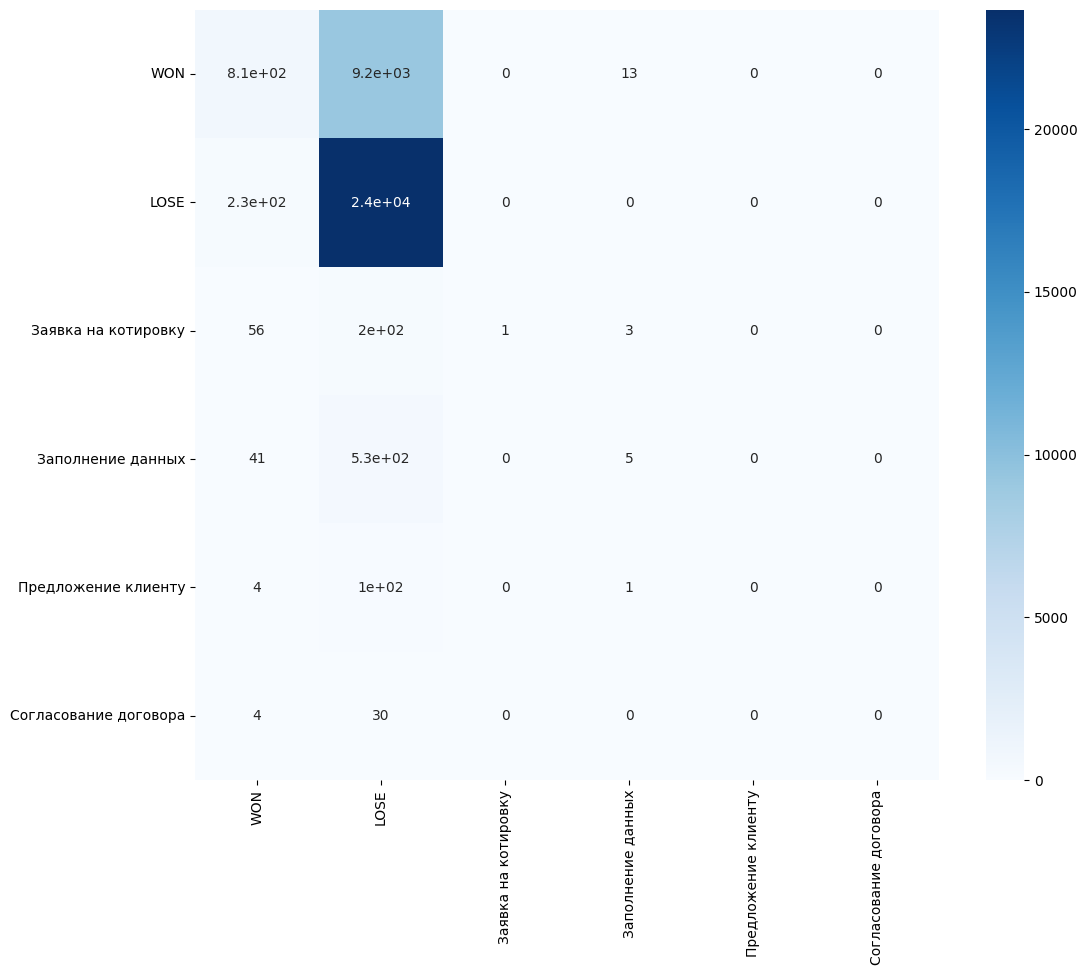

In [93]:
preds = model.predict(X)

confusion_matr = confusion_matrix(y, preds)  # normalize = 'true'
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels=data_labels,
            yticklabels=data_labels)
plt.savefig('prediction_matrix')


In [ ]:
model.classes_

array([0, 1, 2, 3, 4, 5])

In [ ]:
target_encoder.inverse_transform(model.classes_)

array(['LOSE', 'WON', 'Заполнение данных', 'Заявка на котировку',
       'Предложение клиенту', 'Согласование договора'], dtype=object)

In [40]:
pred_proba = model.predict_proba(X)
check_dataframe = dataset.copy()
check_dataframe['predicted'] = target_encoder.inverse_transform(preds)
check_dataframe['WON'] = pred_proba[:, 1]
check_dataframe['LOSE'] = pred_proba[:, 0]
check_dataframe['Заявка на котировку'] = pred_proba[:, 3]
check_dataframe['Заполнение данных'] = pred_proba[:, 2]
check_dataframe['Предложение клиенту'] = pred_proba[:, 4]
check_dataframe['Согласование договора'] = pred_proba[:, 5]
check_dataframe.to_excel("Whole_dataset_dataframe_catboost.xlsx")


In [43]:
pred_proba = model.predict_proba(x_test)
preds = model.predict(x_test)
to_test_dataframe = x_test_extract.copy()
to_test_dataframe['predicted'] = target_encoder.inverse_transform(preds)
check_dataframe['WON'] = pred_proba[:, 1]
check_dataframe['LOSE'] = pred_proba[:, 0]
check_dataframe['Заявка на котировку'] = pred_proba[:, 3]
check_dataframe['Заполнение данных'] = pred_proba[:, 2]
check_dataframe['Предложение клиенту'] = pred_proba[:, 4]
check_dataframe['Согласование договора'] = pred_proba[:, 5]
to_test_dataframe.to_excel("to_test_dataframe.xlsx")


In [ ]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue="Стадия сделки", size=3)
plt.show()
plt.savefig('idk_what_it_is')


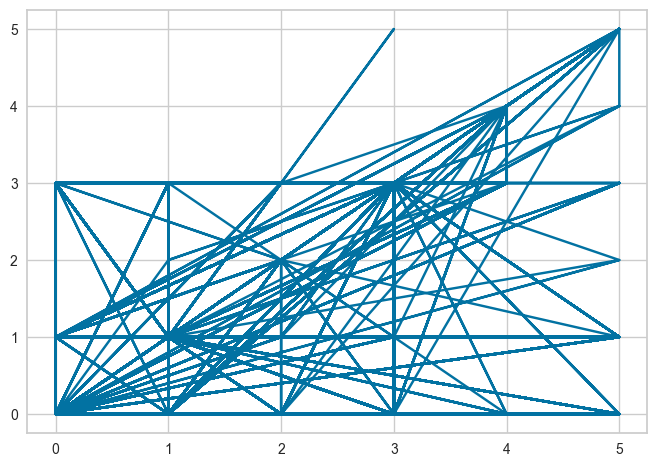

In [103]:
plt.plot(preds, y, animated=True)
plt.style.use('fivethirtyeight')


## Using Catboost directions Optuna


In [25]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)
    #kf = KFold(n_splits=10,random_state=42,shuffle=True)

    param = {
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss', 'CrossEntropy']),
        'eval_metric': trial.suggest_categorical('eval_metric', ['F1', 'CrossEntropy']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 17),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 1.00001, 17),
        'rsm': trial.suggest_float('rsm', 1e-6, 1.0),  
        'fold_permutation_block': trial.suggest_int('fold_permutation_block', 1, 15),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 12),
        'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No', 'AnyImprovement']),
        'depth': trial.suggest_int('depth', 1, 16),
        'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
        'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

        'langevin': trial.suggest_categorical('langevin', [True, False]),

        'iterations': trial.suggest_int('iterations', 2000, 7000),
        'max_bin': trial.suggest_int('max_bin', 90, 600, 1),


    }


    if param['loss_function'] not in ["MultiCrossEntropy", "MultiLogloss", 'CrossEntropy']:
        param['auto_class_weights'] = trial.suggest_categorical(
            'auto_class_weights', ['None', 'Balanced', 'SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
        param['grow_policy'] = 'SymmetricTree'

    if param["boosting_type"] == "Plain":
        param['grow_policy'] = trial.suggest_categorical(
            'grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])

    if param["grow_policy"] != "Lossguide":
        param['sampling_frequency'] = trial.suggest_categorical(
            'sampling_frequency', ['PerTree', 'PerTreeLevel'])

    if param["langevin"] == True:
        param["posterior_sampling"] = trial.suggest_categorical(
            'posterior_sampling', [True, False])

        if param["posterior_sampling"] == True:
            param['model_shrink_mode'] = 'Constant'

        else:
            param['model_shrink_mode'] = trial.suggest_categorical(
                'model_shrink_mode', ['Constant', 'Decreasing'])

    # END OF SETTINGS

    print(param)
    model = cb.CatBoostClassifier(**param)
    model.fit(train_x, train_y, eval_set=[
              (test_x, test_y)], early_stopping_rounds=500, verbose=False)

    #preds = model.predict(test_x)

    #rmse = mean_squared_error(test_y, preds,squared=False)
    # return (model.score(test_x , test_y))

    ### ANOTHER METHOD ###

    preds = model.predict(test_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.balanced_accuracy_score(
        test_y, pred_labels)  # OR ROC_AUG OR accuracy_score

    preds_train = model.predict(train_x)
    pred_labels_train = np.rint(preds_train)

    joblib.dump(study, 'catboost_leads_directions.pkl')

    return accuracy, sklearn.metrics.accuracy_score(test_y, pred_labels), sklearn.metrics.balanced_accuracy_score(train_y, pred_labels_train), sklearn.metrics.accuracy_score(train_y, pred_labels_train)


In [26]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [ ]:
%%time

if os.path.isfile('catboost_leads_directions.pkl'):
    study = joblib.load('catboost_leads_directions.pkl')
else:
    sampler = optuna.multi_objective.samplers.MOTPEMultiObjectiveSampler()
    # ,pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
    study = optuna.create_study(
        directions=['maximize', 'maximize', 'maximize', 'maximize'], sampler=sampler)

study.optimize(objective, n_trials=1_000,  # gc_after_trial=True,
               show_progress_bar=True, n_jobs=-1, callbacks=[logging_callback])


In [25]:
study = joblib.load('catboost_leads_directions.pkl')


In [ ]:
optuna.visualization.plot_optimization_history(study)


In [ ]:
optuna.visualization.plot_parallel_coordinate(study)


In [ ]:
optuna.visualization.plot_slice(study)


In [ ]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)


Number of finished trials: 35
Best trial: {'loss_function': 'MultiLogloss', 'min_data_in_leaf': 2, 'bagging_temperature': 1.585664075268137, 'rsm': 0.5917735538697605, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 2, 'learning_rate': 0.6964507381860883, 'reg_lambda': 3.0755308956530776, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 5, 'allow_const_label': False, 'fold_len_multiplier': 11.767974350933722, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 4225, 'max_bin': 570, 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree'}


In [ ]:
Best_trial = study.best_trial.params
Best_trial


{'loss_function': 'MultiLogloss',
 'min_data_in_leaf': 2,
 'bagging_temperature': 1.585664075268137,
 'rsm': 0.5917735538697605,
 'fold_permutation_block': 1,
 'leaf_estimation_iterations': 2,
 'learning_rate': 0.6964507381860883,
 'reg_lambda': 3.0755308956530776,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'depth': 5,
 'allow_const_label': False,
 'fold_len_multiplier': 11.767974350933722,
 'score_function': 'Cosine',
 'boosting_type': 'Plain',
 'langevin': False,
 'iterations': 4225,
 'max_bin': 570,
 'grow_policy': 'SymmetricTree',
 'sampling_frequency': 'PerTree'}

In [ ]:
study.best_trial.value


0.9998986544428333

In [ ]:
model = cb.CatBoostClassifier()


In [ ]:
model.set_params(**study.best_params)
model.fit(X, y)


In [ ]:
model.get_feature_importance


In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)),
         feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [ ]:
cat_iris_imp = pd.Series(model.get_feature_importance(),
                         df.drop(['opened'], axis=1).columns)
fig, ax = plt.subplots(figsize=(20, 20))
cat_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()


## Using Catboost CV Optuna


In [98]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)

    param = {
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss', 'CrossEntropy']),

        'eval_metric': trial.suggest_categorical('eval_metric', ['F1', 'CrossEntropy', "MCC", "BalancedAccuracy"]),

        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 17),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 1.00001, 17),
        'rsm': trial.suggest_float('rsm', 1e-6, 1.0),  
        'fold_permutation_block': trial.suggest_int('fold_permutation_block', 1, 15),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 12),
        'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No', 'AnyImprovement']),
        'depth': trial.suggest_int('depth', 1, 16),
        'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
        'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

        'langevin': trial.suggest_categorical('langevin', [True, False]),

        'iterations': trial.suggest_int('iterations', 2000, 7000),
        'max_bin': trial.suggest_int('max_bin', 90, 1_000, 1),
        'verbose': 0
        # "used_ram_limit": "12gb",

    }

    # """
    if param['loss_function'] not in ["MultiCrossEntropy", "MultiLogloss", 'CrossEntropy']:
        param['auto_class_weights'] = trial.suggest_categorical(
            'auto_class_weights', ['None', 'Balanced', 'SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
        param['grow_policy'] = 'SymmetricTree'

    if param["boosting_type"] == "Plain":
        param['grow_policy'] = trial.suggest_categorical(
            'grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])

    if param["grow_policy"] != "Lossguide":
        param['sampling_frequency'] = trial.suggest_categorical(
            'sampling_frequency', ['PerTree', 'PerTreeLevel'])

    if param["langevin"] == True:
        param["posterior_sampling"] = trial.suggest_categorical(
            'posterior_sampling', [True, False])

        if param["posterior_sampling"] == True:
            param['model_shrink_mode'] = 'Constant'

        else:
            param['model_shrink_mode'] = trial.suggest_categorical(
                'model_shrink_mode', ['Constant', 'Decreasing'])

    # END OF SETTINGS
    # """
    print(param)
    model = cb.CatBoostClassifier(**param)

    joblib.dump(study, 'catboost_deals_CV.pkl')

    if (param['eval_metric'] == "F1"):
        return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='f1', n_jobs=-1))
    if (param['eval_metric'] == "BalancedAccuracy"):
        return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='balanced_accuracy', n_jobs=-1))
    if (param['eval_metric'] == "MCC"):
        return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='matthews_corrcoef', n_jobs=-1))
    if (param['eval_metric'] == "CrossEntropy"):
        return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='neg_log_loss', n_jobs=-1))+1

    # return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='f1', n_jobs=-1))
    # scores = sklearn.model_selection.cross_validate(model, X, y, cv=10, scoring="f1", n_jobs=-1)
    # print(scores['test_score'])
    # return statistics.mean(scores['test_score'])


In [99]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [ ]:
%%time

if os.path.isfile('catboost_deals_CV.pkl'):
    study = joblib.load('catboost_deals_CV.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)
    study = optuna.create_study(direction='maximize', sampler=sampler)

study.optimize(objective, n_trials=1_000,  # gc_after_trial=True,
               show_progress_bar=True, n_jobs=-1, callbacks=[logging_callback])


In [49]:
study = joblib.load('catboost_deals_CV.pkl')


In [50]:
optuna.visualization.plot_optimization_history(study)


In [51]:
optuna.visualization.plot_parallel_coordinate(study)


[W 2022-11-22 15:16:36,409] Your study has only completed trials with missing parameters.


In [47]:
optuna.visualization.plot_slice(study)


[W 2022-10-31 13:25:59,831] Your study does not have any completed trials.


In [52]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)


Number of finished trials: 20
Best trial: {'loss_function': 'Logloss', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 1, 'bagging_temperature': 12.909581790979116, 'rsm': 0.6596207511978085, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 1, 'learning_rate': 0.25913725705228424, 'reg_lambda': 10.895644240207025, 'leaf_estimation_backtracking': 'No', 'depth': 6, 'allow_const_label': False, 'fold_len_multiplier': 8.153351177359424, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 5302, 'max_bin': 994, 'auto_class_weights': 'SqrtBalanced', 'sampling_frequency': 'PerTree'}


In [53]:
Best_trial = study.best_trial.params
Best_trial


{'loss_function': 'Logloss',
 'eval_metric': 'BalancedAccuracy',
 'min_data_in_leaf': 1,
 'bagging_temperature': 12.909581790979116,
 'rsm': 0.6596207511978085,
 'fold_permutation_block': 1,
 'leaf_estimation_iterations': 1,
 'learning_rate': 0.25913725705228424,
 'reg_lambda': 10.895644240207025,
 'leaf_estimation_backtracking': 'No',
 'depth': 6,
 'allow_const_label': False,
 'fold_len_multiplier': 8.153351177359424,
 'score_function': 'L2',
 'boosting_type': 'Ordered',
 'langevin': False,
 'iterations': 5302,
 'max_bin': 994,
 'auto_class_weights': 'SqrtBalanced',
 'sampling_frequency': 'PerTree'}

In [54]:
study.best_trial.value


0.972798376169896

In [55]:
model = cb.CatBoostClassifier()


In [56]:
model.set_params(**study.best_params)
model.fit(X, y)


0:	learn: 0.9332322	total: 383ms	remaining: 33m 50s
1:	learn: 0.9333287	total: 618ms	remaining: 27m 17s
2:	learn: 0.9335003	total: 791ms	remaining: 23m 17s
3:	learn: 0.9330206	total: 1.03s	remaining: 22m 43s
4:	learn: 0.9367893	total: 1.26s	remaining: 22m 14s
5:	learn: 0.9370185	total: 1.64s	remaining: 24m 5s
6:	learn: 0.9383895	total: 1.87s	remaining: 23m 34s
7:	learn: 0.9389679	total: 2.09s	remaining: 23m 4s
8:	learn: 0.9394028	total: 2.35s	remaining: 22m 59s
9:	learn: 0.9392345	total: 2.58s	remaining: 22m 44s
10:	learn: 0.9395145	total: 2.82s	remaining: 22m 35s
11:	learn: 0.9397821	total: 2.95s	remaining: 21m 41s
12:	learn: 0.9400084	total: 3.2s	remaining: 21m 42s
13:	learn: 0.9405001	total: 3.45s	remaining: 21m 41s
14:	learn: 0.9406026	total: 3.61s	remaining: 21m 12s
15:	learn: 0.9406974	total: 3.74s	remaining: 20m 36s
16:	learn: 0.9412321	total: 3.99s	remaining: 20m 40s
17:	learn: 0.9412629	total: 4.2s	remaining: 20m 32s
18:	learn: 0.9414172	total: 4.32s	remaining: 20m
19:	learn: 

Text(0.5, 1.0, 'Feature Importance')

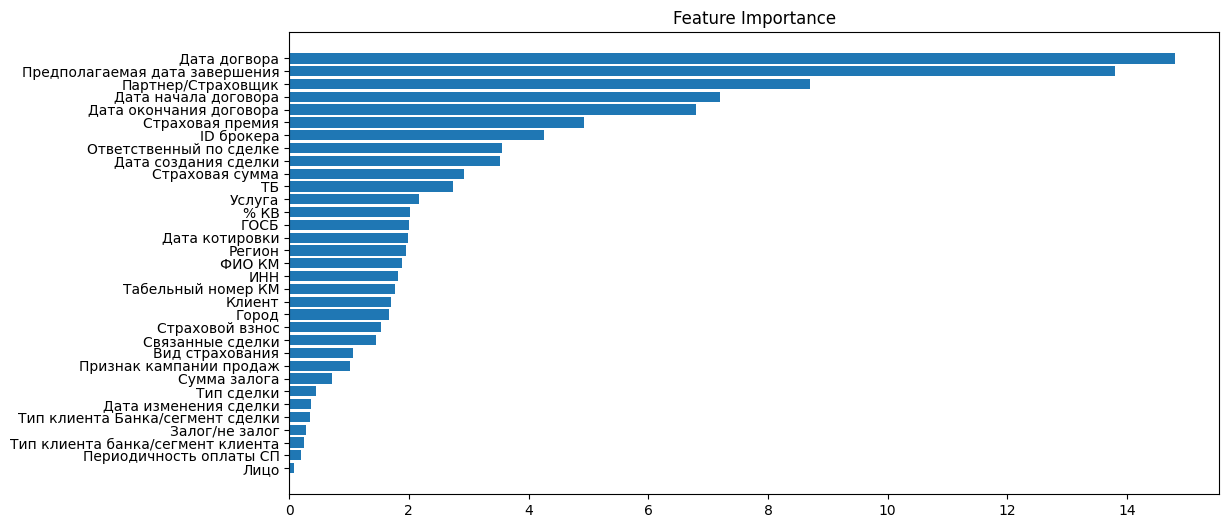

In [57]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)),
         feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')
# Remove first 4 dates


## LightGBM with CV


In [53]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)
    kf = StratifiedKFold(n_splits=10)

    param = {

        'objective': trial.suggest_categorical('objective', ['multiclass', 'goss', 'rf']), #   , 'multiclassova'

        'metric': trial.suggest_categorical('metric', ['multiclass', 'multiclassova', 'auc','auc_mu']), #
        # ,'multi_logloss'
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']), #, 'rf'

        'num_leaves': trial.suggest_int('num_leaves', 2, 70),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 7000),
        'min_split_gain': trial.suggest_float('min_split_gain', 0, 5),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-5, 5),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 70),
        
        'colsample_bytree': trial.suggest_float('colsample_bytree', 1e-5, 1),
        'importance_type': trial.suggest_categorical('importance_type', ['split', 'gain']),

        'num_iterations': trial.suggest_int('num_iterations', 1000, 5000),

        'deterministic': trial.suggest_categorical('deterministic', ['true', 'false']),
        'extra_trees': trial.suggest_categorical('extra_trees', ['true', 'false']),

        'max_bin': trial.suggest_int('max_bin', 255, 700),

    }

    if (param["objective"] != "goss" and param["boosting_type"] != "goss"):
        param['subsample']= trial.suggest_float('subsample', 1e-5, 1)  
        param['subsample_freq']= trial.suggest_int('subsample_freq', -2, 20)

    print(param)
    model = lgbm.LGBMClassifier(**param)

    #""" #Use this in case you want to check without validation
    model.fit(train_x, train_y, eval_set=[
              (test_x, test_y)], early_stopping_rounds=500, verbose=False)

    preds = model.predict(test_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.balanced_accuracy_score(test_y, preds)

    #"""

    #accuracy = statistics.mean(sklearn.model_selection.cross_val_score (model, train_x, train_y, cv=kf, scoring='f1_weighted', n_jobs=-1))



    joblib.dump(study, 'lightGBM_deals.pkl')

    return accuracy


In [54]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [ ]:
%%time

if os.path.isfile('lightGBM_deals.pkl'):
    print("Found file")
    study = joblib.load('lightGBM_deals.pkl')
else:
    sampler = optuna.samplers.TPESampler(
        multivariate=True, warn_independent_sampling=False)
    study = optuna.create_study(
        direction='maximize', load_if_exists=True, sampler=sampler)

study.optimize(objective, n_trials=1_000, gc_after_trial=True,
               show_progress_bar=True, n_jobs=1, callbacks=[logging_callback])
joblib.dump(study, 'lightGBM_deals.pkl')


In [40]:
study = joblib.load(
    r'C:\Users\NONE\Desktop\WORK\MultipleDeals\lightGBM_deals.pkl')


In [41]:
Best_trial = study.best_trial.params
Best_trial


{'metric': 'multi_logloss',
 'objective': 'goss',
 'boosting_type': 'gbdt',
 'num_leaves': 42,
 'learning_rate': 0.4680919465526635,
 'n_estimators': 6809,
 'min_split_gain': 0.6252318529973342,
 'min_child_weight': 1.703628963031186,
 'min_child_samples': 39,
 'colsample_bytree': 0.8417834969966814,
 'importance_type': 'split',
 'num_iterations': 1628,
 'deterministic': 'false',
 'extra_trees': 'false',
 'max_bin': 618}

In [42]:
study.best_trial.value


0.2578039634436636

In [42]:
model = lgbm.LGBMClassifier()


In [ ]:
%%time
model.set_params(**study.best_params)
model.fit(X, y,eval_set=[
              (x_test, y_test)], early_stopping_rounds=650)


In [ ]:
model.save_model("lightGBM_deals.json")


In [ ]:
model = lgbm.LGBMClassifier()
model.load_model("lightGBM_deals.json")


In [ ]:
sklearn.model_selection.cross_val_score(
    model, X, y, cv=10, scoring='f1_weighted', n_jobs=-1)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
statistics.mean(sklearn.model_selection.cross_val_score(
    model, x_train, y_train, cv=10, scoring='f1_weighted', n_jobs=-1))


0.9375049540766712

In [ ]:
statistics.mean(sklearn.model_selection.cross_val_score(
    model, x_test, y_test, cv=10, scoring='f1_weighted', n_jobs=-1))


0.9296217854616242

In [ ]:
model.get_feature_importance


<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostClassifier object at 0x000002062AB40490>>

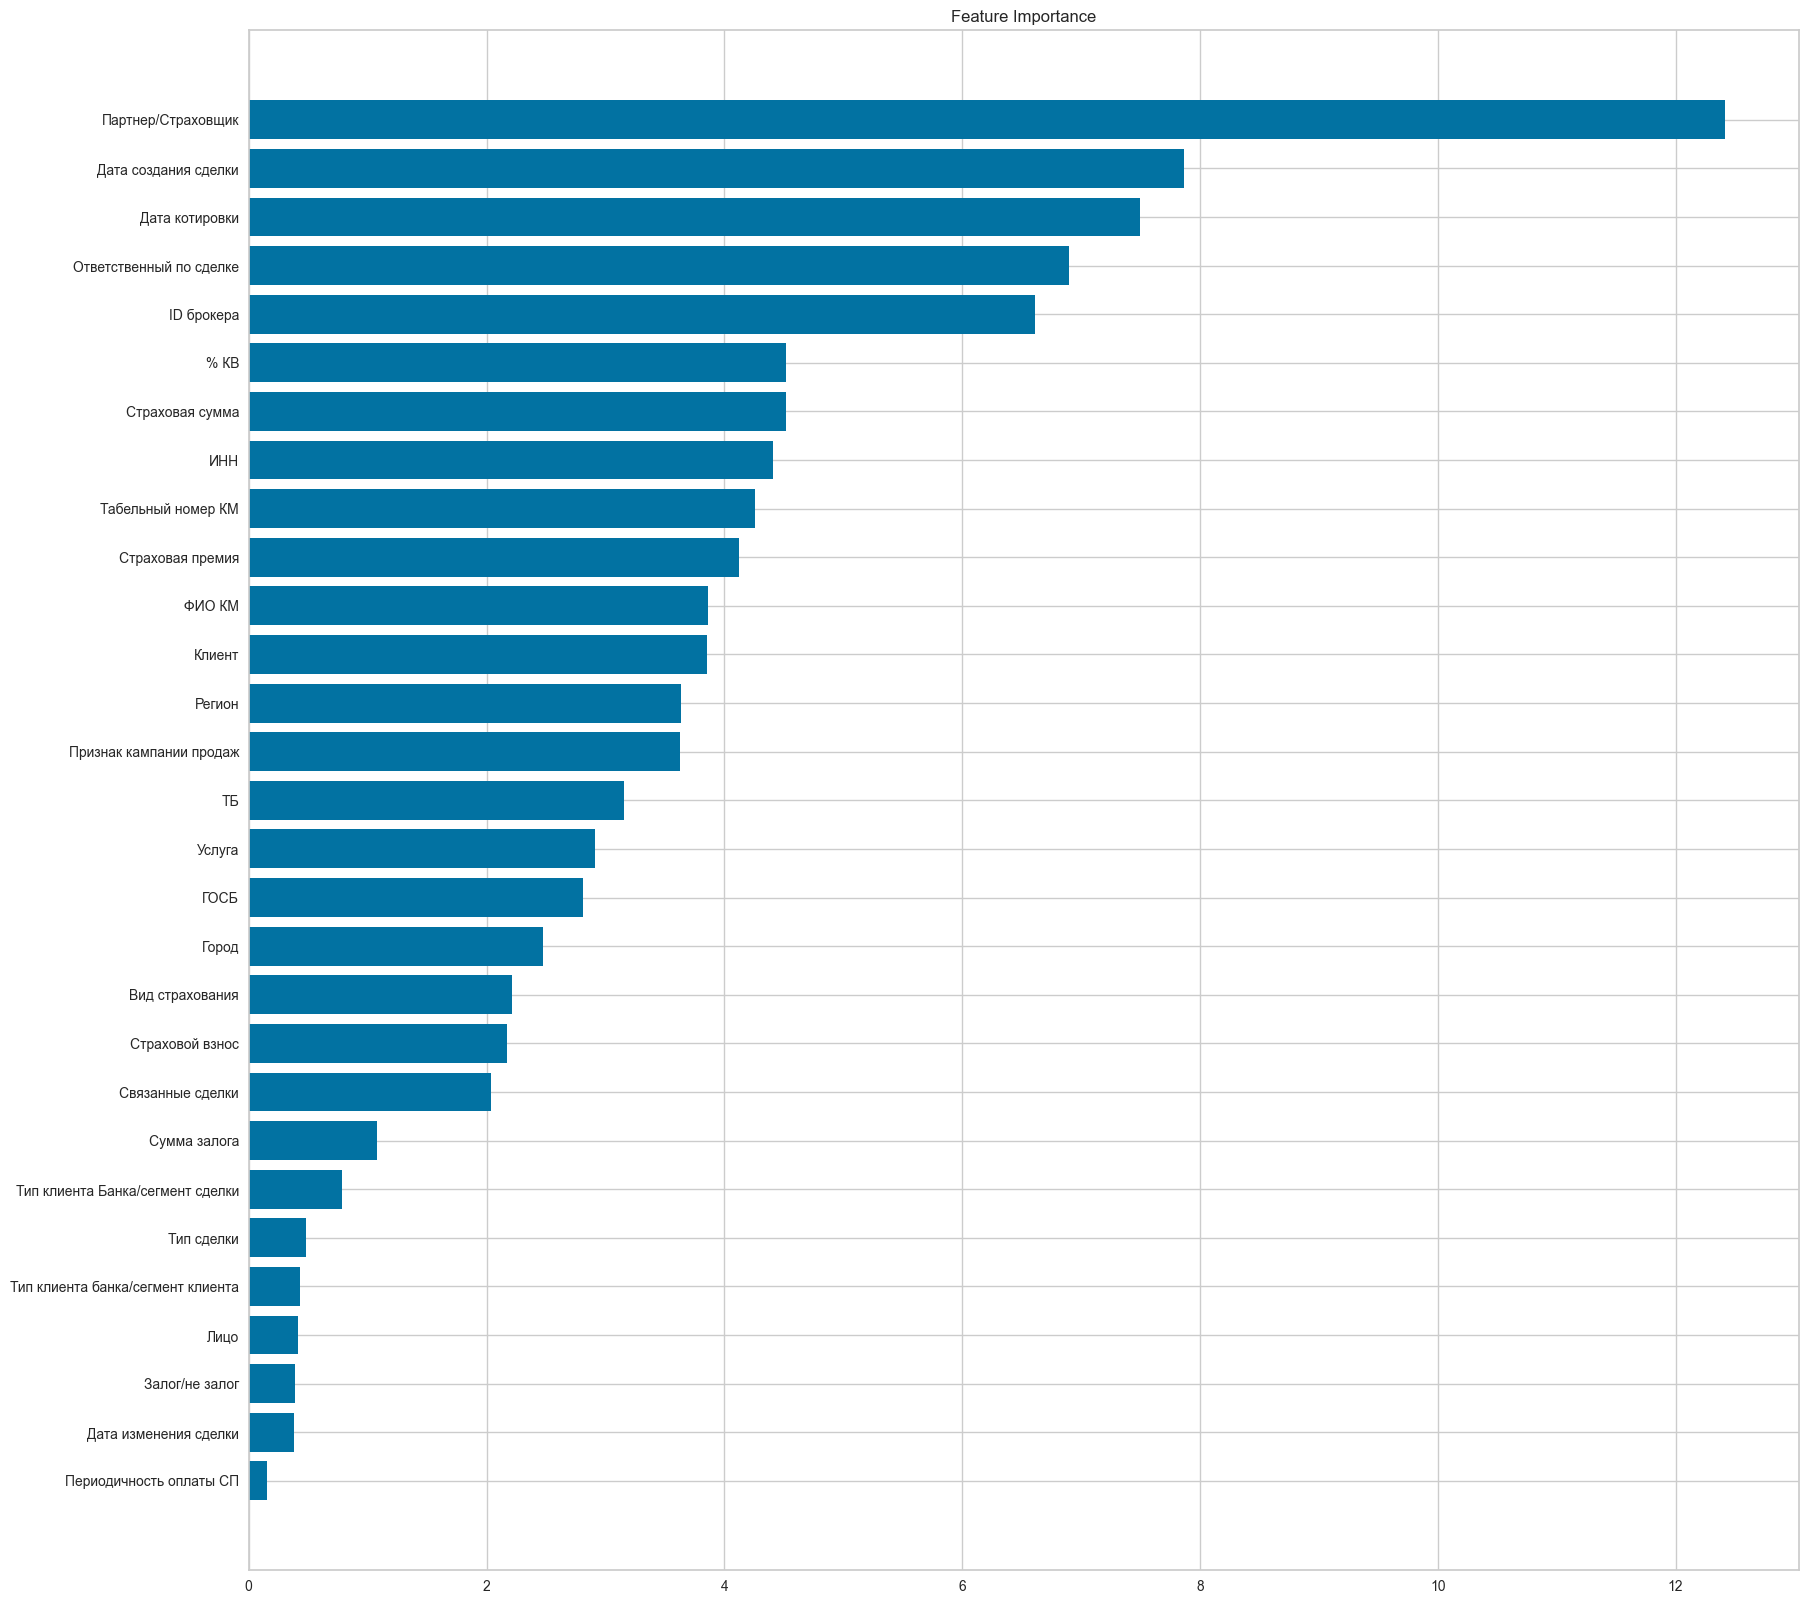

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)),
         feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.savefig('output.png')


In [ ]:
X_w_target = x_train.copy()
X_w_target['Сделка'] = encoded_dataframe['Стадия сделки']
correlation_matrix_w_target = X_w_target.corr()
# correlation_matrix_w_target


In [ ]:
corr = X_w_target.corr()
va = corr.style.background_gradient(
    cmap='coolwarm', axis=None).set_precision(3)
dfi.export(va, 'successful_test.png')
# va


In [ ]:
va.to_excel('output_corr.xlsx', engine='openpyxl')


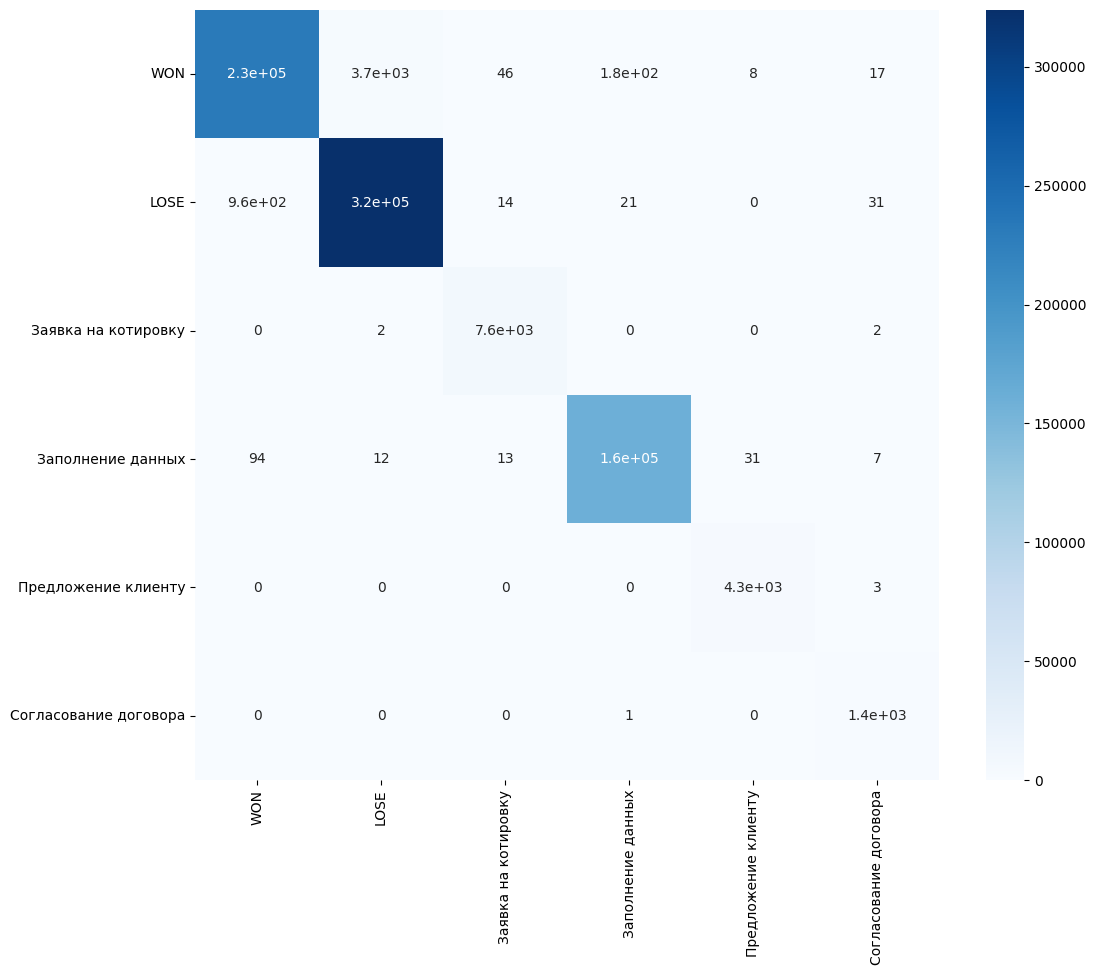

In [ ]:
preds = model.predict(X)

confusion_matr = confusion_matrix(y, preds)  # normalize = 'true'
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels=data_labels,
            yticklabels=data_labels)
plt.savefig('prediction_matrix')


In [ ]:
model.predict_proba(x_test)

array([[4.26871842e-04, 1.89990346e-10, 6.11668021e-11, 2.80870727e-06,
        9.99942704e-01, 2.59950337e-20],
       [8.84817260e-01, 3.29088259e-04, 6.25010089e-08, 7.58371921e-03,
        6.99452787e-12, 5.57498138e-11],
       [1.04078618e-01, 9.24300057e-09, 4.93828131e-09, 9.90508879e-01,
        5.04146286e-08, 6.77761167e-10],
       ...,
       [9.93528896e-01, 1.64378362e-06, 1.22859051e-05, 2.91773874e-06,
        4.60648063e-12, 2.36962345e-11],
       [5.12559992e-06, 5.74211791e-08, 6.24021821e-13, 9.99995815e-01,
        2.18871210e-12, 5.14330499e-07],
       [9.99996444e-01, 1.97154269e-10, 4.14564866e-10, 3.65817323e-06,
        1.77451193e-10, 1.64765021e-14]])

In [ ]:
pred_proba = model.predict_proba(X)
check_dataframe = dataset.copy()
check_dataframe['predicted'] = target_encoder.inverse_transform(preds)
check_dataframe['WON'] = pred_proba[:, 1]
check_dataframe['LOSE'] = pred_proba[:, 0]
check_dataframe['Заявка на котировку'] = pred_proba[:, 3]
check_dataframe['Заполнение данных'] = pred_proba[:, 2]
check_dataframe['Предложение клиенту'] = pred_proba[:, 4]
check_dataframe['Согласование договора'] = pred_proba[:, 5]
check_dataframe.to_excel("Whole_dataset_dataframe.xlsx")


In [ ]:
pred_proba = model.predict_proba(x_test)
preds = model.predict(x_test)
to_test_dataframe = x_test_extract.copy()
to_test_dataframe['predicted'] = target_encoder.inverse_transform(preds)
check_dataframe['WON'] = pred_proba[:, 1]
check_dataframe['LOSE'] = pred_proba[:, 0]
check_dataframe['Заявка на котировку'] = pred_proba[:, 3]
check_dataframe['Заполнение данных'] = pred_proba[:, 2]
check_dataframe['Предложение клиенту'] = pred_proba[:, 4]
check_dataframe['Согласование договора'] = pred_proba[:, 5]
to_test_dataframe.to_excel("to_test_dataframe.xlsx")
